## BoomBikes BikeSharing Case Study

#### Problem Statement:

A US bike-sharing provider BoomBikes has recently suffered considerable dips in their revenues due to the ongoing Corona pandemic. The company is finding it very difficult to sustain in the current market scenario.In such an attempt, BoomBikes aspires to understand the demand for shared bikes among the people after this ongoing quarantine situation ends across the nation due to Covid-19. They have planned this to prepare themselves to cater to the people's needs once the situation gets better all around and stand out from other service providers and make huge profits.

***The company wants to know:***

- Which variables are significant in predicting the demand for shared bikes.
- How well those variables describe the bike demands

***Goal:***
- Develop a model to find the variables which are significant the demand for shared bikes with the available independent variables.
- It will be used by the management to understand and manipulate the business strategy to meet the demand levels and meet the customer's expectations.

### Step 1: Import all required Liberaries

In [2]:
# Supress Warnings

import warnings
warnings.filterwarnings('ignore')

In [3]:
# Import required liberies to read file & EDA

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [4]:
# import liberies for Linear Regression Modelling

import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import r2_score

### Step 2: Read and Understand the dataset

In [5]:
# read the data file
# Check how many rows & column it has

bike = pd.read_csv('/Users/atanu.dutta/Downloads/Bike-Sharing-CaseStudy/day.csv')
bike.shape

(730, 16)

In [521]:
# check the column names
bike.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

In [522]:
# check the datatypes 
bike.dtypes

instant         int64
dteday         object
season          int64
yr              int64
mnth            int64
holiday         int64
weekday         int64
workingday      int64
weathersit      int64
temp          float64
atemp         float64
hum           float64
windspeed     float64
casual          int64
registered      int64
cnt             int64
dtype: object

### Data Dictonary for reference
=========================================
Dataset characteristics
=========================================	
day.csv have the following fields:
	
	- instant: record index
	- dteday : date
	- season : season (1:spring, 2:summer, 3:fall, 4:winter)
	- yr : year (0: 2018, 1:2019)
	- mnth : month ( 1 to 12)
	- holiday : weather day is a holiday or not (extracted from http://dchr.dc.gov/page/holiday-schedule)
	- weekday : day of the week
	- workingday : if day is neither weekend nor holiday is 1, otherwise is 0.
	+ weathersit : 
		- 1: Clear, Few clouds, Partly cloudy, Partly cloudy
		- 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
		- 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
		- 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
	- temp : temperature in Celsius
	- atemp: feeling temperature in Celsius
	- hum: humidity
	- windspeed: wind speed
	- casual: count of casual users
	- registered: count of registered users
	- cnt: count of total rental bikes including both casual and registered

In [523]:
# Check Sample dataset
bike.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [524]:
# do basic stats analysis
bike.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
instant,730.0,365.500000,210.877136,1.000000,183.250000,365.500000,547.750000,730.000000
season,730.0,2.498630,1.110184,1.000000,2.000000,3.000000,3.000000,4.000000
yr,730.0,0.500000,0.500343,0.000000,0.000000,0.500000,1.000000,1.000000
mnth,730.0,6.526027,3.450215,1.000000,4.000000,7.000000,10.000000,12.000000
holiday,730.0,0.028767,0.167266,0.000000,0.000000,0.000000,0.000000,1.000000
weekday,730.0,2.997260,2.006161,0.000000,1.000000,3.000000,5.000000,6.000000
workingday,730.0,0.683562,0.465405,0.000000,0.000000,1.000000,1.000000,1.000000
weathersit,730.0,1.394521,0.544807,1.000000,1.000000,1.000000,2.000000,3.000000
temp,730.0,20.319259,7.506729,2.424346,13.811885,20.465826,26.880615,35.328347
atemp,730.0,23.726322,8.150308,3.953480,16.889713,24.368225,30.445775,42.044800


In [525]:
# Quick stats on Categorical Variables
bike.describe(include='object').transpose()

,count,unique,top,freq
dteday,730,730,01-01-2018,1


In [526]:
# Check info to find non-null details
bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


### Step 3: Cleaning the Dataset 

#### Drop
- instant: record index as its just the index to identify the row
- casual & registered: drop these columns as the sum of both is available as cnt

In [527]:
# dropping instant column from the dataframe
bike.drop(['instant'], axis = 1, inplace = True)

In [528]:
# dropping instant column from the dataframe
bike.drop(['casual'], axis = 1, inplace = True)
bike.drop(['registered'], axis = 1, inplace = True)

### Data type conversion
- convert dteday to date

In [529]:
# conver dteday datatype from object to date
print(min(pd.to_datetime(bike['dteday'],format= '%d-%m-%Y')))
print(max(pd.to_datetime(bike['dteday'],format= '%d-%m-%Y')))

2018-01-01 00:00:00
2019-12-31 00:00:00


In [530]:
bike['dteday'] = pd.to_datetime(bike['dteday'],format= '%d-%m-%Y')

In [531]:
# Add a coloumn to inderstnad how long the business is running starting 2018-01-01
d0 = min(bike['dteday'])
d1 = bike.dteday
bike['Days_Since'] = d1 - d0
bike['Days_Since'] = bike['Days_Since'].astype(str).apply(lambda x: int(x.split()[0]))

In [532]:
# check for any null values
bike.isnull().sum()

dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
cnt           0
Days_Since    0
dtype: int64

In [533]:
# renaming few columns for better readibility
bike.rename(columns={'yr':'year','mnth':'month','hum':'humidity','cnt':'total rental bikes'}, inplace=True)

In [534]:
# Check how many Categorial Variables we have in dataset 
# 'object', 'float64','datetime64','int64'
bike.select_dtypes(include=['object']).columns

Index([], dtype='object')

In [535]:
# Create Categorical Variable based on Data Dictonary
bike['season'].replace({1:'spring',2:'summer',3:'fall',4:'winter'},inplace = True)

bike['weathersit'].replace({1:'good',2:'moderate',3:'adverse',4:'severe'},inplace = True)

bike['month'].replace({1: 'jan',2: 'feb',3: 'mar',4: 'apr',5: 'may',6: 'jun',
                  7: 'jul',8: 'aug',9: 'sept',10: 'oct',11: 'nov',12: 'dec'},inplace = True)

bike['weekday'].replace({0: 'sun',1: 'mon',2: 'tue',3: 'wed',4: 'thu',5: 'fri',6: 'sat'},inplace = True)

In [536]:
bike.head()

,dteday,season,year,month,holiday,weekday,workingday,weathersit,temp,atemp,humidity,windspeed,total rental bikes,Days_Since
0,2018-01-01,spring,0,jan,0,sat,0,moderate,14.110847,18.18125,80.5833,10.749882,985,0
1,2018-01-02,spring,0,jan,0,sun,0,moderate,14.902598,17.68695,69.6087,16.652113,801,1
2,2018-01-03,spring,0,jan,0,mon,1,good,8.050924,9.47025,43.7273,16.636703,1349,2
3,2018-01-04,spring,0,jan,0,tue,1,good,8.200000,10.60610,59.0435,10.739832,1562,3
4,2018-01-05,spring,0,jan,0,wed,1,good,9.305237,11.46350,43.6957,12.522300,1600,4


### Step 4: EDA 

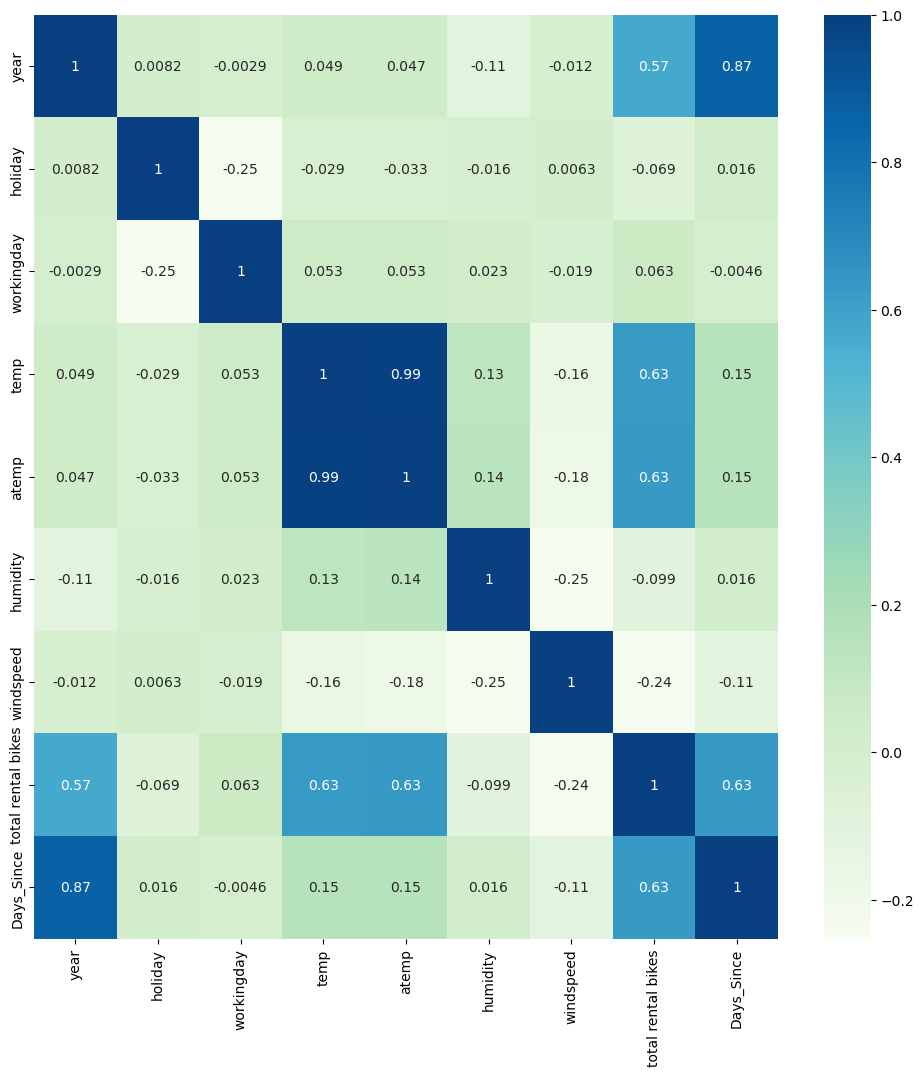

In [537]:
# Visualizing the data
plt.figure(figsize=(12,12))
bike_corr = bike.corr()
sns.heatmap(bike_corr,annot= True, cmap='GnBu')
plt.show()

#### Observation:
- Total Rental Bikes is highly corelated with temp, atemp, year & days since
- Temp & Atemp is highly corelatted with .99 close to 1

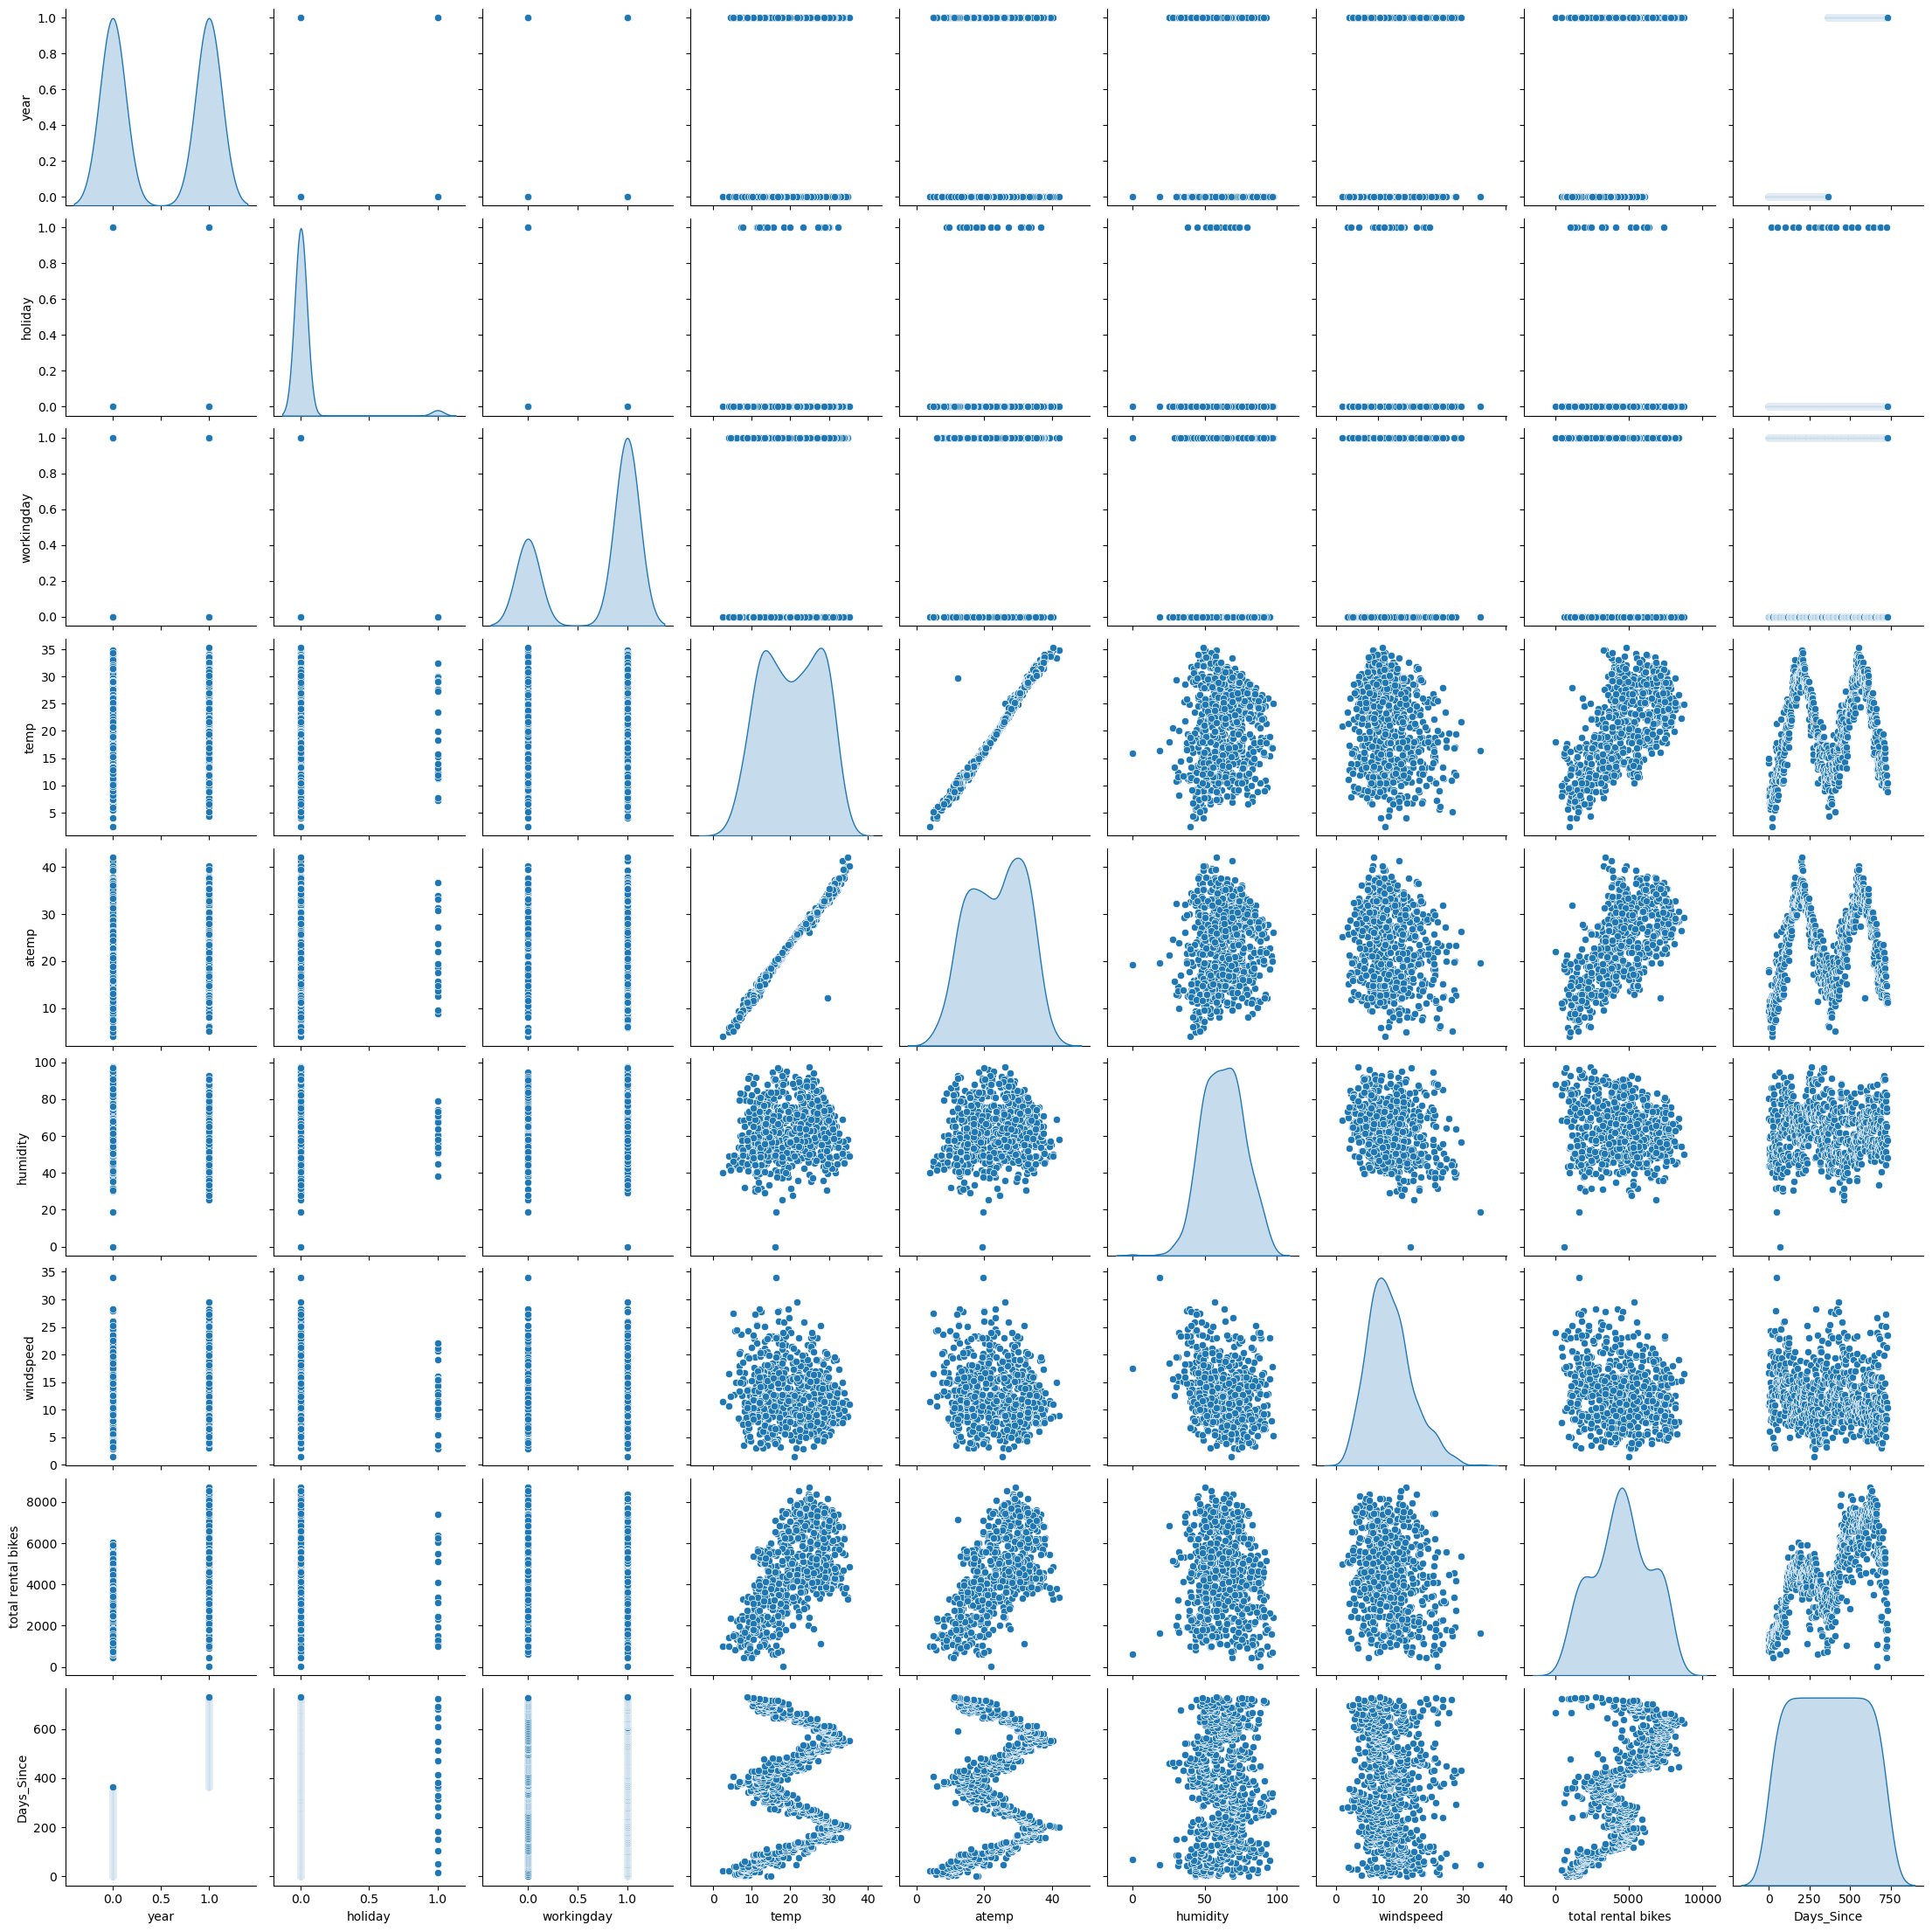

In [538]:
sns.pairplot(bike.select_dtypes(include =['float64','int64']),diag_kind='kde')
plt.show()

In [539]:
# plt.figure(figsize=(20,15))
# sns.pairplot(bike.select_dtypes(include =['float64','int64']))
# plt.show()

#### Observation:
- Temp & ATemp is highly correlated
- hence, we can plan to drop one of the variable

#### Compare the Categorical Variable 

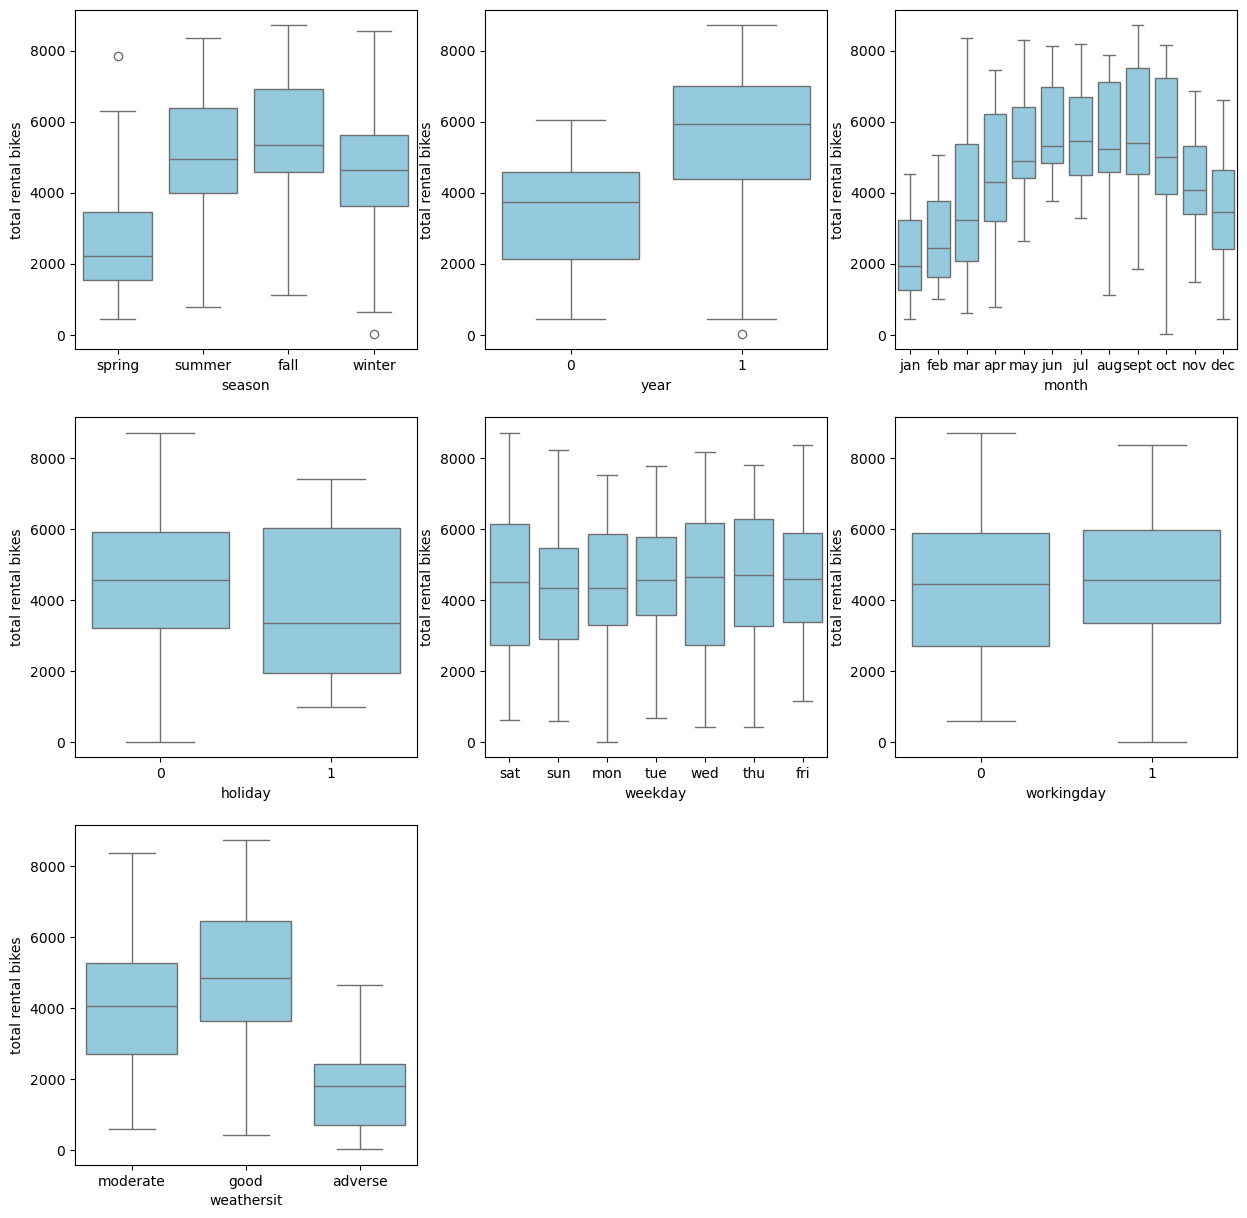

In [540]:
# Boxplot for categorical variables 
vars_cat = ['season','year','month','holiday','weekday','workingday','weathersit']
plt.figure(figsize=(15, 15))
for i in enumerate(vars_cat):
    plt.subplot(3,3,i[0]+1)
    sns.boxplot(data=bike, x=i[1], y='total rental bikes',color='skyblue')
plt.show()

#### Observations:
- Season: Fall has the higest demand of biles followed by summer & winter
- Year: over a period of time the demand increased in 2019, mostly post Covid
- Month: the demand constantly grown from Jan till June and then it became constant and started faling during oct to december
- Holiday: During Holidays demand has decreeased 
- Weekday: Weekday is having no impact on the demand 
- Working day: THe mean remains constant and it has no impact
- Weathershit: during good days the demand is really high followed by moderate

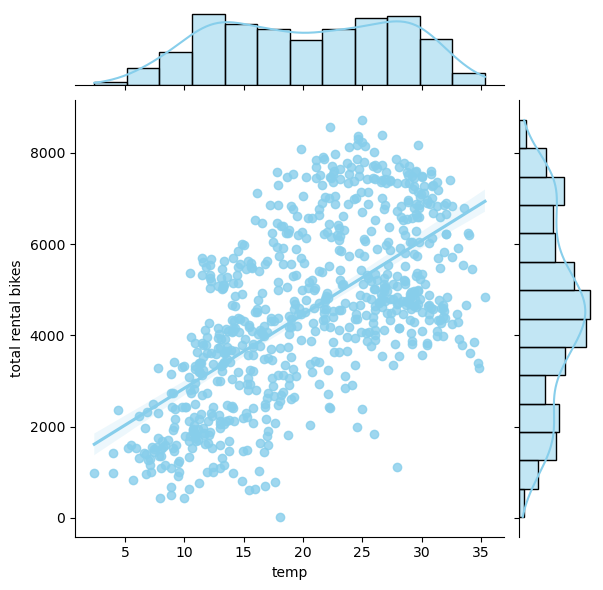

In [541]:
# Plot Total rental bikes vs atemp to check the impact
sns.jointplot(x='temp', y='total rental bikes', data=bike, kind="reg",color='skyblue')
plt.show()

#### observation:
- we can see its positively correlated 

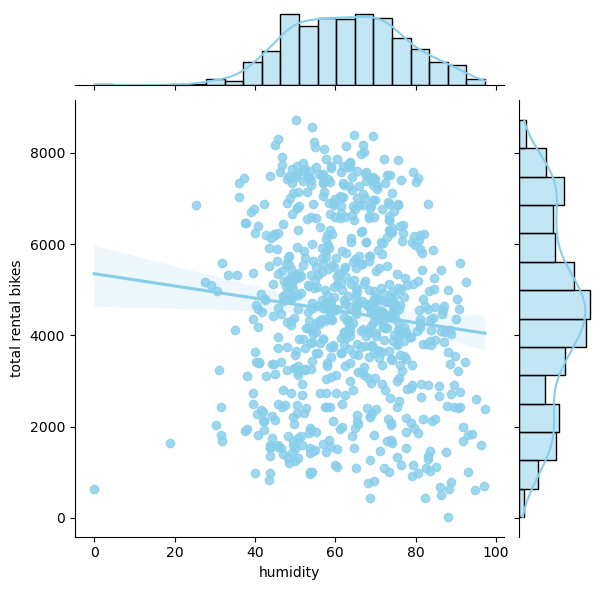

In [542]:
# Plot Total rental bikes vs humidity to check the impact
sns.jointplot(x='humidity', y='total rental bikes', data=bike, kind="reg",color='skyblue')
plt.show()

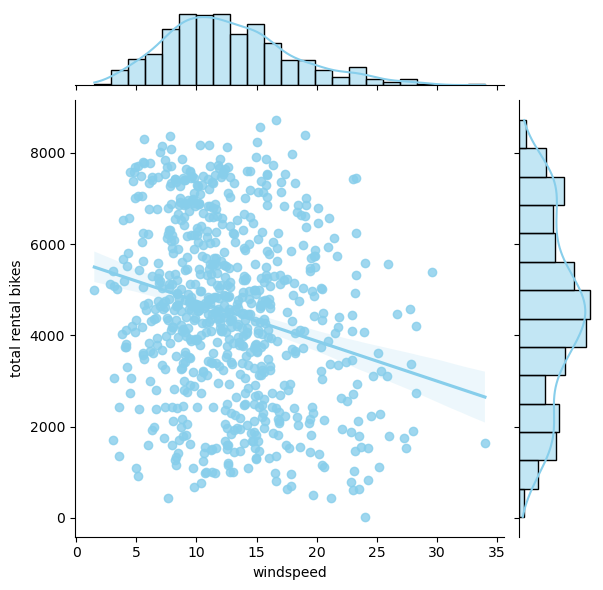

In [543]:
# Plot Total rental bikes vs windspeed to check the impact
sns.jointplot(x='windspeed', y='total rental bikes', data=bike, kind="reg",color='skyblue')
plt.show()

#### Observation:
- We see for windspeed and humidity the values are more scattered around the line
- both also the rental of bike decreses with increase in humidity and windspeed

### Step 5: Data preperation for Linear Regression

#### Create Dummy Variables 

In [544]:
bike_categorical = bike.select_dtypes(include=['object'])
bike_categorical.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   season      730 non-null    object
 1   month       730 non-null    object
 2   weekday     730 non-null    object
 3   weathersit  730 non-null    object
dtypes: object(4)
memory usage: 22.9+ KB


In [545]:
# Creating the dummy variables with N-1 logic for Season. But for weathershit keeping all as right not in the dataaset we only have 3 values instead of 4 
bike_dummies = pd.get_dummies(bike_categorical,drop_first = True)
bike_dummies.head()

,season_spring,season_summer,season_winter,month_aug,month_dec,month_feb,month_jan,month_jul,month_jun,month_mar,...,month_oct,month_sept,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed,weathersit_good,weathersit_moderate
0,1,0,0,0,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,0,1
1,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,1
2,1,0,0,0,0,0,1,0,0,0,...,0,0,1,0,0,0,0,0,1,0
3,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,1,0,1,0
4,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,1,0


In [546]:
# Bring the Dummy Variables into the main dataframe
bike = pd.concat([bike,bike_dummies],axis = 1)

In [547]:
# Drop the categorical columns which are no longer required 
bike.drop(columns = list(bike_categorical.columns),axis = 1, inplace = True)

In [548]:
# Drop Dteday as it will not be useful for our analysis
bike.drop(columns = ['dteday'],axis = 1, inplace = True)
bike.drop(columns = ['atemp'],axis = 1, inplace = True)

In [549]:
bike.head()

,year,holiday,workingday,temp,humidity,windspeed,total rental bikes,Days_Since,season_spring,season_summer,...,month_oct,month_sept,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed,weathersit_good,weathersit_moderate
0,0,0,0,14.110847,80.5833,10.749882,985,0,1,0,...,0,0,0,1,0,0,0,0,0,1
1,0,0,0,14.902598,69.6087,16.652113,801,1,1,0,...,0,0,0,0,1,0,0,0,0,1
2,0,0,1,8.050924,43.7273,16.636703,1349,2,1,0,...,0,0,1,0,0,0,0,0,1,0
3,0,0,1,8.200000,59.0435,10.739832,1562,3,1,0,...,0,0,0,0,0,0,1,0,1,0
4,0,0,1,9.305237,43.6957,12.522300,1600,4,1,0,...,0,0,0,0,0,0,0,1,1,0


### Step 6: Modelling Building
#### Split Train & Test dataset

In [550]:
df_train, df_test = train_test_split(bike, train_size=0.70, test_size=0.30, random_state=100)

In [551]:
df_train.shape

(510, 30)

In [552]:
df_test.shape

(219, 30)

##### Scaling of numberic variables

In [553]:
scaler = MinMaxScaler()

In [554]:
var_to_scale = ['temp','humidity','windspeed','Days_Since']
df_train[var_to_scale] = scaler.fit_transform(df_train[var_to_scale])

In [557]:
# Check the stats post Scaling is applied. Ensure we don't scale the Target Variable
df_train.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
year,510.0,0.507843,0.500429,0.0,0.000000,1.000000,1.000000,1.0
holiday,510.0,0.025490,0.157763,0.0,0.000000,0.000000,0.000000,1.0
workingday,510.0,0.676471,0.468282,0.0,0.000000,1.000000,1.000000,1.0
temp,510.0,0.537262,0.225844,0.0,0.339853,0.540519,0.735215,1.0
humidity,510.0,0.650369,0.145882,0.0,0.538643,0.653714,0.754830,1.0
windspeed,510.0,0.320768,0.169797,0.0,0.199179,0.296763,0.414447,1.0
total rental bikes,510.0,4486.382353,1952.158739,22.0,3120.000000,4530.000000,5973.500000,8714.0
Days_Since,510.0,0.505414,0.288281,0.0,0.255838,0.510989,0.759272,1.0
season_spring,510.0,0.243137,0.429398,0.0,0.000000,0.000000,0.000000,1.0
season_summer,510.0,0.245098,0.430568,0.0,0.000000,0.000000,0.000000,1.0


### Model Building Step 1 (Evaluate all 30 features using StatsModel)

In [558]:
#df_train.columns
y_train = df_train.pop('total rental bikes')
X_train = df_train

In [559]:
# First build it using Stats model before we evaluate it using RFE for reference
X_train_lm = sm.add_constant(X_train)
lr = sm.OLS(y_tain, X_train_lm).fit()
lr.params

const                   460.561099
year                   2491.112912
holiday                -330.776178
workingday              425.561617
temp                   3912.821897
humidity              -1308.043999
windspeed             -1618.002292
Days_Since             -943.769721
season_spring          -423.574574
season_summer           337.404401
season_winter           914.363077
month_aug               286.348743
month_dec               -75.174150
month_feb              -353.242613
month_jan              -656.745363
month_jul              -230.213094
month_jun                55.772708
month_mar               -27.552929
month_may               246.302944
month_nov               -79.272751
month_oct               312.294259
month_sept              904.109649
weekday_mon            -181.732196
weekday_sat             420.317336
weekday_sun             -54.541676
weekday_thu             -80.830684
weekday_tue            -164.613702
weekday_wed             -47.429074
weathersit_good     

In [560]:
# Check the Summary Status for all features
lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:     total rental bikes   R-squared:                       0.853
Model:                            OLS   Adj. R-squared:                  0.845
Method:                 Least Squares   F-statistic:                     99.95
Date:                Wed, 13 Mar 2024   Prob (F-statistic):          8.52e-181
Time:                        20:53:59   Log-Likelihood:                -4097.8
No. Observations:                 510   AIC:                             8254.
Df Residuals:                     481   BIC:                             8376.
Df Model:                          28                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                 460.5611    485.908      0.948      0.344    -494.203    1415.325
year                 2491.1129   1424.910      1.748      0.081    -308.704    5290.930
holiday              -330.7762    230.336     -1.436      0.152    -783.365     121.812
workingday            425.5616    143.192      2.972      0.003     144.202     706.922
temp                 3912.8219    402.834      9.713      0.000    3121.290    4704.354
humidity            -1308.0440    335.491     -3.899      0.000   -1967.253    -648.835
windspeed           -1618.0023    223.677     -7.234      0.000   -2057.508   -1178.497
Days_Since           -943.7697   2836.285     -0.333      0.739   -6516.809    4629.270
season_spring        -423.5746    261.147     -1.622      0.105    -936.705      89.556
season_summer         337.4044    227.953      1.480      0.139    -110.503     785.312
season_winter         914.3631    243.331      3.758      0.000     436.240    1392.486
month_aug             286.3487    566.003      0.506      0.613    -825.795    1398.492
month_dec             -75.1742   1008.115     -0.075      0.941   -2056.028    1905.680
month_feb            -353.2426    359.861     -0.982      0.327   -1060.336     353.850
month_jan            -656.7454    443.314     -1.481      0.139   -1527.817     214.326
month_jul            -230.2131    473.472     -0.486      0.627   -1160.542     700.116
month_jun              55.7727    328.244      0.170      0.865    -589.196     700.741
month_mar             -27.5529    240.105     -0.115      0.909    -499.337     444.231
month_may             246.3029    215.800      1.141      0.254    -177.725     670.331
month_nov             -79.2728    911.587     -0.087      0.931   -1870.458    1711.913
month_oct             312.2943    804.408      0.388      0.698   -1268.293    1892.881
month_sept            904.1096    661.129      1.368      0.172    -394.949    2203.168
weekday_mon          -181.7322    133.189     -1.364      0.173    -443.436      79.971
weekday_sat           420.3173    149.926      2.803      0.005     125.726     714.908
weekday_sun           -54.5417    152.930     -0.357      0.722    -355.035     245.951
weekday_thu           -80.8307    134.966     -0.599      0.550    -346.027     184.366
weekday_tue          -164.6137    134.796     -1.221      0.223    -429.475     100.247
weekday_wed           -47.4291    129.560     -0.366      0.714    -302.002     207.144
weathersit_good      2240.4173    229.210      9.775      0.000    1790.041    2690.794
weathersit_moderate  1706.6390    217.128      7.860      0.000    1280.002    2133.276
==============================================================================
Omnibus:                       83.239   Durbin-Watson:                   2.041
Prob(Omnibus):       

#### Observation
- The R2 is 85.5 and Adj R2 is 84.5 which is very good interms of training test
- We also see for may variables the P values is really high close to 20 variables

#### Action
- lets not use RFE to suggest 15 features, instead of 30 to start with and then we will compare it against 10 variables

### Create function to build Stats Model & get VIF Scores

In [561]:
#Function to build a model using statsmodel api - Takes the columns to be selected for model as a parameter
def build_model(cols):
    X_train_sm = sm.add_constant(X_train[cols])
    lm = sm.OLS(y_train, X_train_sm).fit()
    print(lm.summary())
    return lm

In [562]:
#Function to calculate VIFs and print them -Takes the columns for which VIF to be calcualted as a parameter
def get_vif(cols):
    df1 = X_train[cols]
    vif = pd.DataFrame()
    vif['Features'] = df1.columns
    vif['VIF'] = [variance_inflation_factor(df1.values, i) for i in range(df1.shape[1])]
    vif['VIF'] = round(vif['VIF'],2)
    print(vif.sort_values(by='VIF',ascending=False))

### Model Building Step 2 (Find 15 features out of 30)

In [563]:

# RFE with 15 features
lm = LinearRegression()
rfe1 = RFE(estimator=lm, n_features_to_select=15)

# Fit with 15 features
rfe1.fit(X_train, y_train)

# Print the boolean results
print(rfe1.support_) # Boolean mask of selected features           
print(rfe1.ranking_) # Ranking of features (1 denotes selected features) 

[ True  True  True  True  True  True False  True  True  True False False
 False False  True False False False False False  True False  True  True
 False False False  True  True]
[ 1  1  1  1  1  1  8  1  1  1  7  4  5  2  1 13 15  6  3  9  1 10  1  1
 12 11 14  1  1]


In [564]:
# Print the names of selected features along with their rankings, sorted by ranking
for feature, ranking in sorted(zip(X_train.columns, rfe1.ranking_), key=lambda x: x[1]):
    print(f"Feature: {feature}, Ranking: {ranking}")

Feature: year, Ranking: 1
Feature: holiday, Ranking: 1
Feature: workingday, Ranking: 1
Feature: temp, Ranking: 1
Feature: humidity, Ranking: 1
Feature: windspeed, Ranking: 1
Feature: season_spring, Ranking: 1
Feature: season_summer, Ranking: 1
Feature: season_winter, Ranking: 1
Feature: month_jul, Ranking: 1
Feature: month_sept, Ranking: 1
Feature: weekday_sat, Ranking: 1
Feature: weekday_sun, Ranking: 1
Feature: weathersit_good, Ranking: 1
Feature: weathersit_moderate, Ranking: 1
Feature: month_jan, Ranking: 2
Feature: month_nov, Ranking: 3
Feature: month_dec, Ranking: 4
Feature: month_feb, Ranking: 5
Feature: month_may, Ranking: 6
Feature: month_aug, Ranking: 7
Feature: Days_Since, Ranking: 8
Feature: month_oct, Ranking: 9
Feature: weekday_mon, Ranking: 10
Feature: weekday_tue, Ranking: 11
Feature: weekday_thu, Ranking: 12
Feature: month_jun, Ranking: 13
Feature: weekday_wed, Ranking: 14
Feature: month_mar, Ranking: 15


### Model Building Step 3 (Use this above 15 features to evalute in StatsModel)

In [565]:
col1 = X_train.columns[rfe1.support_]
print(build_model(col1))
print(get_vif(col1))

                            OLS Regression Results                            
Dep. Variable:     total rental bikes   R-squared:                       0.847
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     196.3
Date:                Wed, 13 Mar 2024   Prob (F-statistic):          1.13e-191
Time:                        20:54:09   Log-Likelihood:                -4107.9
No. Observations:                 510   AIC:                             8246.
Df Residuals:                     495   BIC:                             8309.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  33.5471    

#### Observation
- Compare to our first model with 30 features, 15 features is also returning good Adjusted R2 of 84.3%
- We still see there is one feature with P value higher than .05

### Model Building Step 3 (Find 10 features out of 30)

In [566]:

# RFE with 15 features
lm = LinearRegression()
rfe2 = RFE(estimator=lm, n_features_to_select=10)

# Fit with 15 features
rfe2.fit(X_train, y_train)

# Print the boolean results
print(rfe2.support_) # Boolean mask of selected features           
print(rfe2.ranking_) # Ranking of features (1 denotes selected features) 

[ True  True  True  True False  True False  True False False False False
 False False False False False False False False False False  True  True
 False False False  True  True]
[ 1  1  1  1  2  1 13  1  6  5 12  9 10  7  3 18 20 11  8 14  4 15  1  1
 17 16 19  1  1]


In [567]:
# Print the names of selected features along with their rankings, sorted by ranking
for feature, ranking in sorted(zip(X_train.columns, rfe2.ranking_), key=lambda x: x[1]):
    print(f"Feature: {feature}, Ranking: {ranking}")

Feature: year, Ranking: 1
Feature: holiday, Ranking: 1
Feature: workingday, Ranking: 1
Feature: temp, Ranking: 1
Feature: windspeed, Ranking: 1
Feature: season_spring, Ranking: 1
Feature: weekday_sat, Ranking: 1
Feature: weekday_sun, Ranking: 1
Feature: weathersit_good, Ranking: 1
Feature: weathersit_moderate, Ranking: 1
Feature: humidity, Ranking: 2
Feature: month_jul, Ranking: 3
Feature: month_sept, Ranking: 4
Feature: season_winter, Ranking: 5
Feature: season_summer, Ranking: 6
Feature: month_jan, Ranking: 7
Feature: month_nov, Ranking: 8
Feature: month_dec, Ranking: 9
Feature: month_feb, Ranking: 10
Feature: month_may, Ranking: 11
Feature: month_aug, Ranking: 12
Feature: Days_Since, Ranking: 13
Feature: month_oct, Ranking: 14
Feature: weekday_mon, Ranking: 15
Feature: weekday_tue, Ranking: 16
Feature: weekday_thu, Ranking: 17
Feature: month_jun, Ranking: 18
Feature: weekday_wed, Ranking: 19
Feature: month_mar, Ranking: 20


In [568]:
col2 = X_train.columns[rfe2.support_]
print(build_model(col2))
print(get_vif(col2))

                            OLS Regression Results                            
Dep. Variable:     total rental bikes   R-squared:                       0.822
Model:                            OLS   Adj. R-squared:                  0.818
Method:                 Least Squares   F-statistic:                     255.9
Date:                Wed, 13 Mar 2024   Prob (F-statistic):          7.47e-181
Time:                        20:54:12   Log-Likelihood:                -4147.7
No. Observations:                 510   AIC:                             8315.
Df Residuals:                     500   BIC:                             8358.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                 171.6282    

### Model Building Step 3 (Find 7 features out of 30)

In [569]:

# RFE with 15 features
lm = LinearRegression()
rfe3 = RFE(estimator=lm, n_features_to_select=7)

# Fit with 15 features
rfe3.fit(X_train, y_train)

# Print the boolean results
print(rfe3.support_) # Boolean mask of selected features           
print(rfe3.ranking_) # Ranking of features (1 denotes selected features) 

[ True  True  True  True False  True False False False False False False
 False False False False False False False False False False  True  True
 False False False False False]
[ 1  1  1  1  5  1 16  4  9  8 15 12 13 10  6 21 23 14 11 17  7 18  1  1
 20 19 22  2  3]


In [570]:
# Print the names of selected features along with their rankings, sorted by ranking
for feature, ranking in sorted(zip(X_train.columns, rfe3.ranking_), key=lambda x: x[1]):
    print(f"Feature: {feature}, Ranking: {ranking}")

Feature: year, Ranking: 1
Feature: holiday, Ranking: 1
Feature: workingday, Ranking: 1
Feature: temp, Ranking: 1
Feature: windspeed, Ranking: 1
Feature: weekday_sat, Ranking: 1
Feature: weekday_sun, Ranking: 1
Feature: weathersit_good, Ranking: 2
Feature: weathersit_moderate, Ranking: 3
Feature: season_spring, Ranking: 4
Feature: humidity, Ranking: 5
Feature: month_jul, Ranking: 6
Feature: month_sept, Ranking: 7
Feature: season_winter, Ranking: 8
Feature: season_summer, Ranking: 9
Feature: month_jan, Ranking: 10
Feature: month_nov, Ranking: 11
Feature: month_dec, Ranking: 12
Feature: month_feb, Ranking: 13
Feature: month_may, Ranking: 14
Feature: month_aug, Ranking: 15
Feature: Days_Since, Ranking: 16
Feature: month_oct, Ranking: 17
Feature: weekday_mon, Ranking: 18
Feature: weekday_tue, Ranking: 19
Feature: weekday_thu, Ranking: 20
Feature: month_jun, Ranking: 21
Feature: weekday_wed, Ranking: 22
Feature: month_mar, Ranking: 23


In [571]:
col3 = X_train.columns[rfe3.support_]
print(build_model(col3))
print(get_vif(col3))

                            OLS Regression Results                            
Dep. Variable:     total rental bikes   R-squared:                       0.718
Model:                            OLS   Adj. R-squared:                  0.714
Method:                 Least Squares   F-statistic:                     212.9
Date:                Wed, 13 Mar 2024   Prob (F-statistic):          1.40e-134
Time:                        20:54:16   Log-Likelihood:                -4264.9
No. Observations:                 510   AIC:                             8544.
Df Residuals:                     503   BIC:                             8573.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const         994.7393    142.033      7.004      

#### Observartion:
- holiday has high p value on .460 & weekday_sun has p Value of .200
- Workdingday VIF is 9.14
- Both R2 and Adjusted R2 has dropped when I selected 7 features vs 10 features

In [572]:
# Lets drop weekday_sun with high P value from feature 10 and retest

In [573]:
col2_1 = col2.drop('weekday_sun')

In [574]:
print(build_model(col2_1))
print(get_vif(col2_1))

                            OLS Regression Results                            
Dep. Variable:     total rental bikes   R-squared:                       0.822
Model:                            OLS   Adj. R-squared:                  0.818
Method:                 Least Squares   F-statistic:                     255.9
Date:                Wed, 13 Mar 2024   Prob (F-statistic):          7.47e-181
Time:                        20:54:21   Log-Likelihood:                -4147.7
No. Observations:                 510   AIC:                             8315.
Df Residuals:                     500   BIC:                             8358.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  78.0343    

In [575]:
col2_2 = col2_1.drop('holiday')

In [576]:
print(build_model(col2_2))
print(get_vif(col2_2))

                            OLS Regression Results                            
Dep. Variable:     total rental bikes   R-squared:                       0.821
Model:                            OLS   Adj. R-squared:                  0.818
Method:                 Least Squares   F-statistic:                     287.0
Date:                Wed, 13 Mar 2024   Prob (F-statistic):          1.23e-181
Time:                        20:54:23   Log-Likelihood:                -4148.8
No. Observations:                 510   AIC:                             8316.
Df Residuals:                     501   BIC:                             8354.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  22.7385    

In [577]:
col2_3 = col2_2.drop('weathersit_good')

In [578]:
print(build_model(col2_3))
print(get_vif(col2_3))

                            OLS Regression Results                            
Dep. Variable:     total rental bikes   R-squared:                       0.779
Model:                            OLS   Adj. R-squared:                  0.775
Method:                 Least Squares   F-statistic:                     252.2
Date:                Wed, 13 Mar 2024   Prob (F-statistic):          7.38e-160
Time:                        20:54:24   Log-Likelihood:                -4202.8
No. Observations:                 510   AIC:                             8422.
Df Residuals:                     502   BIC:                             8456.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                2302.8820    

In [579]:
#Build a model with all columns to select features automatically
def build_model_sk(X,y):
    lr1 = LinearRegression()
    lr1.fit(X,y)
    return lr1

In [580]:
#Let us build the finalmodel using sklearn
cols = ['year', 'workingday', 'temp',
        'windspeed', 'season_spring', 'weekday_sat',
       'weathersit_moderate']

#Build a model with above columns
lr = build_model_sk(X_train[cols],y_train)
print(lr.intercept_,lr.coef_)

2302.8820318819726 [ 2100.90466782   397.86331082  3296.60043004 -1581.32696406
 -1226.85867385   493.24925025  -567.07125706]


### Step . Model Evaluation

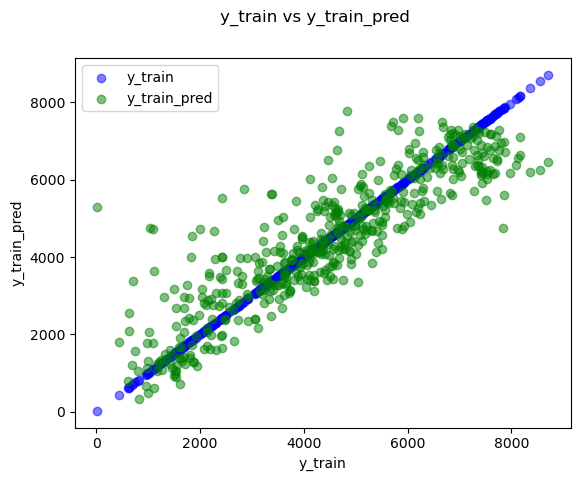

In [581]:
# Linearity: Check the linearity assumption by plotting the observed values against the predicted values. 
# The plot should ideally form a straight line with no discernible pattern. 


# Plotting y_train and y_train_pred to understand the spread
fig = plt.figure()

# Plot y_test
plt.scatter(y_train, y_train, color='blue', alpha=0.5, label='y_train')

# Plot y_test_pred
plt.scatter(y_train, y_train_pred, color='green', alpha=0.5, label='y_train_pred')

fig.suptitle('y_train vs y_train_pred', fontsize=12)  # Plot heading 
plt.xlabel('y_train', fontsize=10)                   # X-label
plt.ylabel('y_train_pred', fontsize=10)              # Y-label
plt.legend()                                        # Show legend
plt.show()


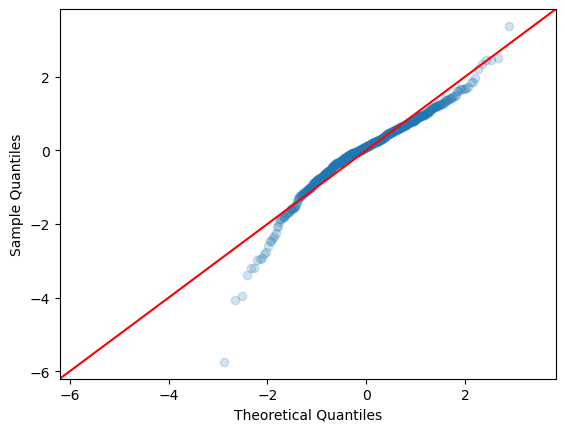

In [582]:
# Plot the qq-plot of the error terms with mild color and transparency
sm.qqplot((y_train - y_train_pred), fit=True, line='45')
plt.gca().get_lines()[0].set_alpha(0.2)  # Set transparency level for the blue dots
plt.show()

In [583]:
y_train_pred = lr.predict(X_train[cols])

In [584]:
# Normality of Residuals: Examine the distribution of residuals using histograms. 
# The residuals should ideally follow a normal distribution. 


#Plot a histogram of the error terms
def plot_res_dist(act, pred):
    sns.distplot(act-pred)
    plt.title('Error Terms')
    plt.xlabel('Errors')

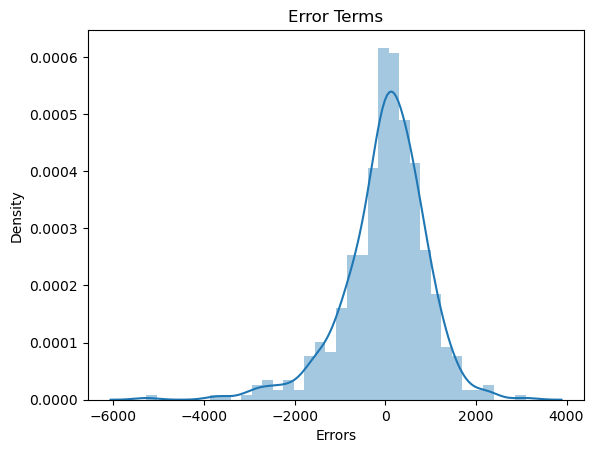

In [585]:
plot_res_dist(y_train, y_train_pred)

#### Observation: Errors are normally distribured here with mean 0. So everything seems to be fine

In [586]:
#Print R-squared Value
r2_score(y_train,y_train_pred)

0.7785721984799765

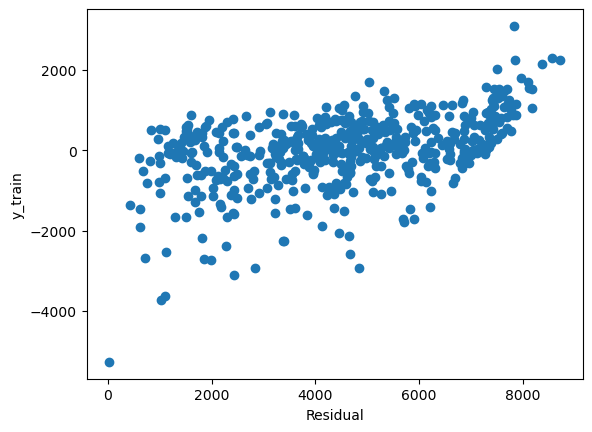

In [587]:
# Homoscedasticity: Assess the homoscedasticity assumption by plotting residuals against predicted values. 
# The plot should ideally show constant variance across all predicted values. 
# A cone-shaped or funnel-shaped pattern indicates heteroscedasticity.

# scatter plot for the check
residual = (y_train - y_train_pred)
plt.scatter(y_train,residual)
plt.ylabel("y_train")
plt.xlabel("Residual")
plt.show()

### Predict values for test data set

In [588]:
var_to_scale = ['temp','humidity','windspeed','Days_Since']
df_test[var_to_scale] = scaler.transform(df_test[var_to_scale])

In [589]:
# Split the 'df_test' set into X and y after scaling
y_test = df_test.pop('total rental bikes')
X_test = df_test

In [590]:
cols = ['year', 'workingday', 'temp',
        'windspeed', 'season_spring', 'weekday_sat',
       'weathersit_moderate']
X_test_rfe1 = X_test[cols]

In [591]:
y_test_pred = lr.predict(X_test_rfe1)

## Test the Linear Regression Assumptions

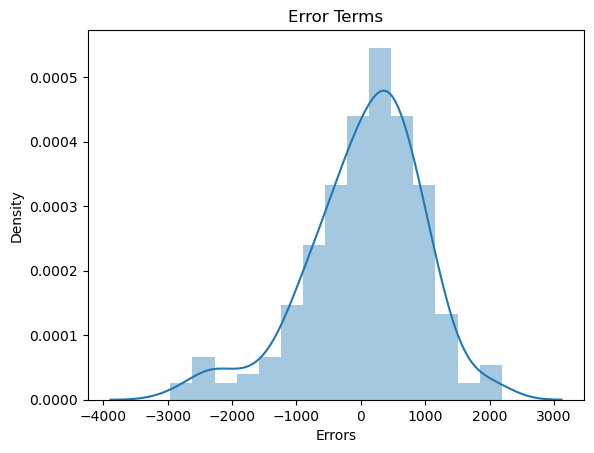

In [592]:
plot_res_dist(y_test, y_test_pred)

In [593]:
#Print R-squared Value
r2_score(y_test,y_test_pred)

0.7700300887931093

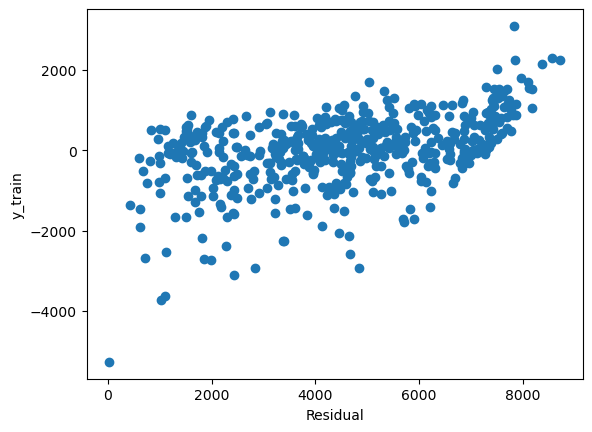

In [594]:
# scatter plot for the check
residual = (y_train - y_train_pred)
plt.scatter(y_train,residual)
plt.ylabel("y_train")
plt.xlabel("Residual")
plt.show()

In [595]:
# Error terms
def plot_err_terms(act,pred):
    c = [i for i in range(1,y_test.shape[0]+1,1)]
    fig = plt.figure(figsize=(14,5))
    plt.plot(c,act-pred, color="blue", marker='o', linewidth=2.5, linestyle="")
    fig.suptitle('Error Terms', fontsize=20)              # Plot heading 
    plt.xlabel('Index', fontsize=18)                      # X-label
    plt.ylabel('Counts - Predicted Counts', fontsize=16)                # Y-label

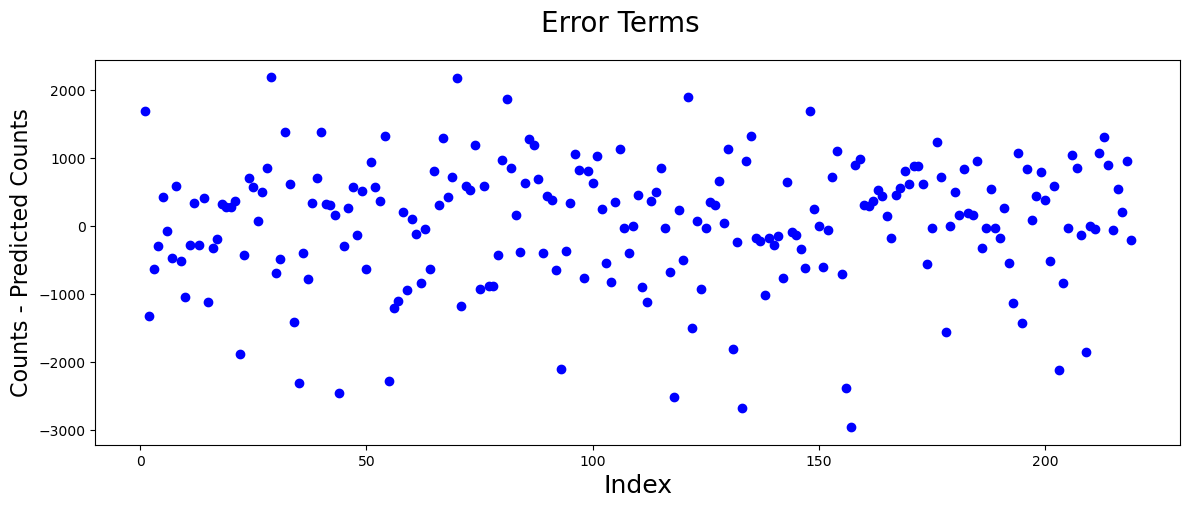

In [596]:
#Plot error terms for test data
plot_err_terms(y_test,y_test_pred)

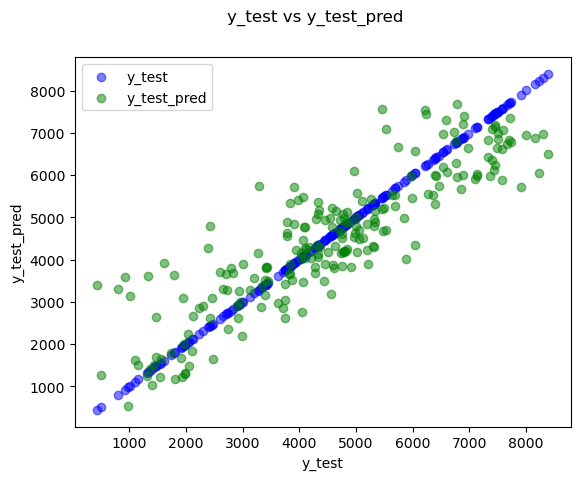

In [597]:
# Plotting y_test and y_test_pred to understand the spread
fig = plt.figure()

# Plot y_test
plt.scatter(y_test, y_test, color='blue', alpha=0.5, label='y_test')

# Plot y_test_pred
plt.scatter(y_test, y_test_pred, color='green', alpha=0.5, label='y_test_pred')

fig.suptitle('y_test vs y_test_pred', fontsize=12)  # Plot heading 
plt.xlabel('y_test', fontsize=10)                   # X-label
plt.ylabel('y_test_pred', fontsize=10)              # Y-label
plt.legend()                                        # Show legend
plt.show()


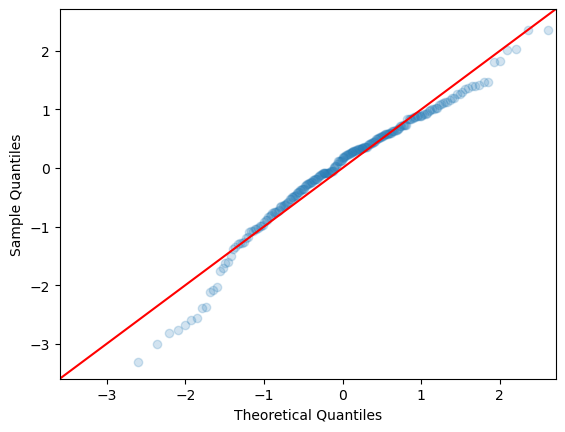

In [598]:
# Plot the qq-plot of the error terms with mild color and transparency
sm.qqplot((y_test - y_test_pred), fit=True, line='45')
plt.gca().get_lines()[0].set_alpha(0.2)  # Set transparency level for the blue dots
plt.show()